In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from sklearn.metrics import classification_report

```python
# Use the alternative stopwords imported below (with meny more stopwords)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('swedish')
```

In [3]:
import pprint as pp

In [4]:
from inc import stop_words as sw
from inc import extra_stopwords as esw

In [5]:
from sqlalchemy import create_engine
table_name = 'Training_set_new'
db_path = 'db/training.sqlite'
db_path = 'sqlite:///' + db_path
engine = create_engine(db_path, echo=True)

In [6]:
df = pd.read_sql_table(table_name, engine)

2020-12-19 17:44:01,816 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-12-19 17:44:01,817 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:44:01,819 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-12-19 17:44:01,819 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:44:01,821 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-12-19 17:44:01,821 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:44:01,823 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='view' ORDER BY name
2020-12-19 17:44:01,824 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:44:01,826 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("Training_set_new")
2020-12-19 17:44:01,826 INFO sqlalchemy.engine.base.Engine ()
2020-12-19 17:44:01,829 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master

In [7]:
df = df.rename(columns={"class": "label"})
df = df.convert_dtypes()

In [8]:
df = df.sample(frac=1).reset_index(drop=True) # randomize

In [9]:
train = df.sample(frac=0.8,random_state=200) #random state is a seed value
test = df.drop(train.index)

In [10]:
train_data = train.abstract.tolist()
train_labels = train.label.tolist()

test_data = test.abstract.tolist()
test_labels = test.label.tolist()

In [13]:
from collections import Counter
print(Counter(train_labels))
print(Counter(test_labels))

Counter({'7': 86, '14': 84, '12': 83, '17': 82, '3': 82, '15': 82, '16': 81, '2': 80, '13': 80, '8': 77, '11': 76, '10': 76, '9': 73, '4': 72, '6': 67, '5': 46})
Counter({'9': 27, '11': 24, '10': 24, '8': 23, '2': 20, '13': 20, '6': 20, '16': 19, '3': 18, '15': 18, '17': 18, '12': 17, '4': 16, '14': 16, '7': 14, '5': 13})


In [14]:
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.common_stopwords)
sw.STOP_WORDS = sw.STOP_WORDS.union(esw.extra_stopwords)

In [15]:
tfidf_vectorizer = TfidfVectorizer(stop_words=sw.STOP_WORDS, max_features=None)

term_docs_train = tfidf_vectorizer.fit_transform(train_data)
term_docs_test = tfidf_vectorizer.transform(test_data)

In [16]:
from sklearn.svm import SVC

In [17]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(term_docs_train, train_labels)

SVC(kernel='linear', random_state=42)

In [18]:
accuracy = svm.score(term_docs_test, test_labels)
print('The accuracy of multiclass classification is: {0:.1f}%'.format(accuracy*100))

The accuracy of multiclass classification is: 39.7%


In [27]:
labels = svm.predict(term_docs_test)

In [28]:
confusion_mx = {}
for ix, label in enumerate(labels):
    if label == test_labels[ix]:
        if label in confusion_mx:
            confusion_mx[label] += 1
        else:
            confusion_mx[label] = 1

In [29]:
conf_labels = list(map(str, list(range(2,18))))

In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_labels, labels, labels=conf_labels)

In [31]:
sorted_dict = dict(sorted(confusion_mx.items()))

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

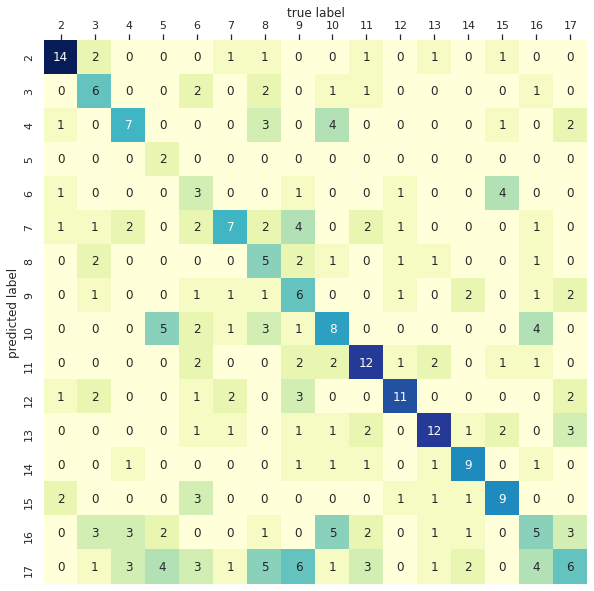

In [33]:
sns.set(style="white", color_codes=True)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="YlGnBu")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

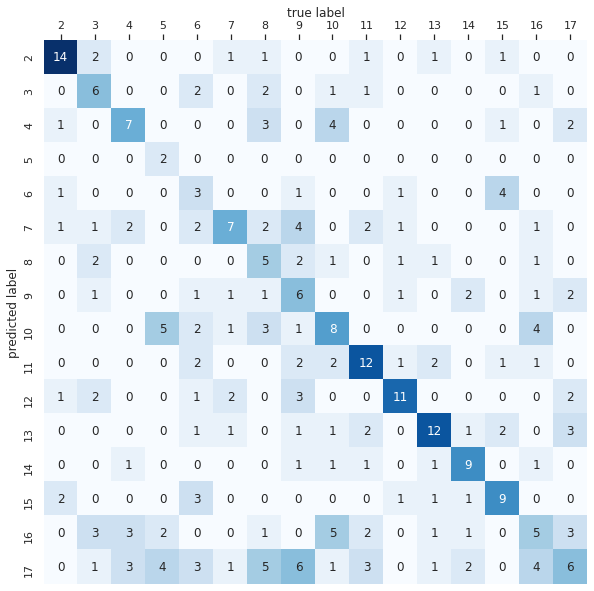

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=conf_labels, yticklabels=conf_labels,cmap="Blues")
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')

plt.xlabel('true label')
plt.ylabel('predicted label');

In [39]:
print(labels)

['11' '16' '16' '14' '15' '2' '15' '9' '11' '8' '11' '10' '2' '2' '4' '11'
 '15' '14' '12' '10' '16' '4' '13' '12' '13' '12' '17' '13' '12' '13' '4'
 '17' '13' '15' '4' '14' '16' '17' '15' '17' '2' '16' '2' '13' '3' '13'
 '7' '13' '17' '13' '17' '9' '3' '15' '14' '17' '16' '15' '9' '17' '3'
 '17' '7' '15' '7' '9' '16' '17' '14' '2' '16' '16' '13' '10' '16' '8'
 '12' '12' '4' '7' '16' '2' '11' '10' '17' '6' '7' '11' '7' '10' '4' '7'
 '9' '2' '7' '8' '7' '14' '14' '11' '2' '15' '13' '13' '14' '2' '7' '17'
 '11' '16' '11' '7' '10' '17' '8' '7' '3' '12' '16' '11' '17' '5' '12'
 '16' '17' '13' '15' '14' '6' '11' '3' '10' '10' '14' '12' '4' '17' '9'
 '11' '15' '16' '14' '11' '11' '7' '15' '9' '8' '6' '2' '11' '17' '13' '4'
 '10' '12' '4' '7' '9' '17' '8' '11' '4' '2' '11' '2' '8' '6' '17' '9' '4'
 '16' '12' '17' '17' '12' '11' '9' '5' '9' '17' '7' '10' '9' '17' '12'
 '15' '10' '17' '3' '2' '14' '16' '2' '10' '7' '10' '9' '17' '2' '15' '6'
 '16' '8' '12' '17' '17' '14' '10' '12' '17' '13' '6'

In [40]:
print(test_labels)

['11', '3', '4', '9', '12', '2', '15', '9', '11', '8', '11', '7', '2', '2', '4', '11', '15', '14', '12', '9', '10', '8', '15', '9', '13', '12', '16', '6', '3', '11', '8', '10', '13', '6', '10', '14', '3', '9', '15', '8', '2', '16', '2', '13', '8', '13', '2', '13', '6', '13', '9', '6', '3', '13', '10', '8', '11', '15', '9', '11', '11', '17', '7', '14', '7', '12', '17', '17', '14', '2', '10', '16', '11', '10', '10', '9', '17', '12', '4', '4', '3', '2', '11', '16', '16', '15', '7', '15', '9', '5', '10', '11', '8', '15', '12', '8', '8', '11', '14', '13', '3', '2', '17', '13', '14', '2', '7', '17', '10', '16', '11', '7', '5', '9', '12', '7', '6', '7', '10', '16', '8', '5', '12', '5', '17', '17', '2', '14', '15', '11', '3', '10', '5', '14', '12', '17', '4', '16', '6', '15', '8', '14', '9', '11', '3', '6', '14', '16', '15', '2', '9', '8', '15', '4', '10', '3', '4', '6', '3', '7', '8', '11', '8', '2', '6', '3', '13', '15', '14', '9', '17', '13', '12', '5', '5', '6', '11', '14', '5', '9', '9', 

In [41]:
fig.savefig('img/heat_map_SVM.png')

In [42]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, labels)

In [43]:
print(report)

              precision    recall  f1-score   support

          10       0.33      0.33      0.33        24
          11       0.52      0.50      0.51        24
          12       0.50      0.65      0.56        17
          13       0.50      0.60      0.55        20
          14       0.60      0.56      0.58        16
          15       0.53      0.50      0.51        18
          16       0.19      0.26      0.22        19
          17       0.15      0.33      0.21        18
           2       0.67      0.70      0.68        20
           3       0.46      0.33      0.39        18
           4       0.39      0.44      0.41        16
           5       1.00      0.15      0.27        13
           6       0.30      0.15      0.20        20
           7       0.30      0.50      0.38        14
           8       0.38      0.22      0.28        23
           9       0.38      0.22      0.28        27

    accuracy                           0.40       307
   macro avg       0.45   